# Part 1. Calculating the Morning and Evening Peak Hours

This section focuses on creating a dataframe that displays Morning and Evening Peak hours from TFL hourlyExits dataset.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [6]:
# The hourlyExits dataset is uploaded into a dataframe through the following code.

exits = pd.read_csv("hourlyExits.csv", index_col = "Station")
exits

FileNotFoundError: [Errno 2] No such file or directory: 'hourlyExits.csv'

In [3]:
"""
The first two steps creates the AM and PM peak hours. These are stored back into the exits dataframe as new columns.
Thereafter, a new dataframe called peak_counts is created - it consists of the AMpeak and PMpeak columns.

"""

exits["AMpeak"] = exits["H07"] + exits["H08"] + exits["H09"]
exits["PMpeak"] = exits["H16"] + exits["H17"] + exits["H18"]

peak_counts = exits[["AMpeak", "PMpeak"]].copy()

peak_counts

,AMpeak,PMpeak
Station,,
Acton Town,1970,2628
Aldgate,7408,2992
Aldgate East,7618,3803
Alperton,856,1847
Amersham,424,1465
...,...,...
Wimbledon Park,497,1114
Wood Green,2165,6494
Wood Lane,1798,1766


In [4]:
"""
Further columns that show the total exits per station is added to peak_counts through the .assign() and .apply(). 
The Hourlyexits dataset is apploaded again to summate the total exits and exits cannot be used due to the AMpeak and PMpeak columns.
Two additional columns that show the proportion of AM and PM exits compared to the total number of exits
are also added to the dataframe; these are labelled AMproportion and PMproportions respectively.
"""

og_exits = pd.read_csv("hourlyExits.csv", index_col = "Station")

peak_counts = peak_counts.assign(Total_exits = og_exits.apply(sum, axis=1))
peak_counts = peak_counts.assign(AMproportion = (peak_counts.AMpeak / peak_counts.Total_exits))
peak_counts = peak_counts.assign(PMproportion = (peak_counts.PMpeak / peak_counts.Total_exits))

peak_counts

,AMpeak,PMpeak,Total_exits,AMproportion,PMproportion
Station,,,,,
Acton Town,1970,2628,9362,0.210425,0.280709
Aldgate,7408,2992,16136,0.459098,0.185424
Aldgate East,7618,3803,21206,0.359238,0.179336
Alperton,856,1847,5118,0.167253,0.360883
Amersham,424,1465,3905,0.108579,0.375160
...,...,...,...,...,...
Wimbledon Park,497,1114,3296,0.150789,0.337985
Wood Green,2165,6494,18989,0.114013,0.341987
Wood Lane,1798,1766,6610,0.272012,0.267171


# Part 2: Plotting and Analysing Distributions

This section describes the peak_counts dataframe and aims contextualise the data for hourly exits on the Tube.
Different elements such as range, quartiles, and the mean for AMpeak and PMpeak are compared to each other.

Additionally, a histogram depicting the AMproportion and PMproportion is also created and analysed to provide insight into
the behavioural patterns of Tube users.


In [5]:
peak_counts.describe()

,AMpeak,PMpeak,Total_exits,AMproportion,PMproportion
count,268.000000,268.000000,268.000000,268.000000,268.000000
mean,4549.768657,4477.555970,17194.477612,0.207132,0.298750
std,8181.784059,6276.463316,23480.190142,0.122161,0.087724
min,27.000000,239.000000,596.000000,0.045302,0.084630
25%,677.500000,1471.750000,4889.500000,0.116120,0.240947
50%,1517.000000,2622.000000,9210.000000,0.169378,0.307397
75%,4315.250000,4707.750000,19999.500000,0.266443,0.361596
max,61116.000000,59486.000000,149258.000000,0.630427,0.496079


#### *Description of peak_counts Statistics*

The data is for a weekday in 2017. This description compares the statistic of both AMproportion and PMproportion.

**Range**
<br>The range is calculated by subracting the smallest (or min value) from the largest value(max). The range for AMproportion (0.585) is larger than PMproportion (0.411), which shows that there is a larger distribution of exits during the morning than the evening.

**Mean**
<br>The mean for PMproportion is larger than AMproportion, which indicates that on average, the proportion of exits are larger during the evenings than in the morning.

**Median**
<br>The PMproportion has a significantly larger median compared to the AMproportion, which agrees with the mean in suggesting that a larger proportion of exits occur during the evening than the morning. 
<br>Furthermore, the symmetry of exit distribution can be revealed by comparing the relation of mean to the medium. For AMproportion, the median is smaller than the mean which shows that the proportion of exits are skewed positively during the AM peak, which suggests that a few stations have a large number of exits that is causing the data to skew. In relation to London, this correlates with the fact that many people travel into London from other parts of the UK during the morning rush hour for work. In contrast, the median for PMproportion is very similar to the mean which suggests that the distribution of exits is almost symmetrical, however it has a very minor negative skew. In relation to London, the proportion of exits are distributed similarly across all stations.

**Quartiles**
<br> The interquartile range (IQR) is calculated as the difference between the upper and lower quartiles. The IQR larger for AMproportion (0.15) in comparison to PMproportion (0.12), which shows that the data in AMproportion more widely varied than the data in PMproportion.

**Standard Deviation**
<br> The standard deviation is larger in AMproportion (0.122) than PMproportion (0.087) which shows that the distribution of data varies more largely from the mean in the AMproportion than the PMproportion. Therefore, there is a greater variety in the number of exits that occur in the AMproportion than in the PMproportion. This also correlates and confirms with the explanation of distribution symmetry of the Median and the travel patterns of commuters in London on a weekday.


#### *Coding for Histograms*

The code below is used to create two overlapping histograms through the **plt.hist** function that takens into account of which columns to plot as a histogram. The bin size was optimised to 15 as previous attempts with 20 and 25 bins were two large and left gaps in the histogram.
The advantage of overlaying the histograms here allows one to interpret the data and make comparison more readily. Furthermore, it allows both histograms to share
the same axis and titles. A further description of these histograms is given below.

<function matplotlib.pyplot.show(close=None, block=None)>

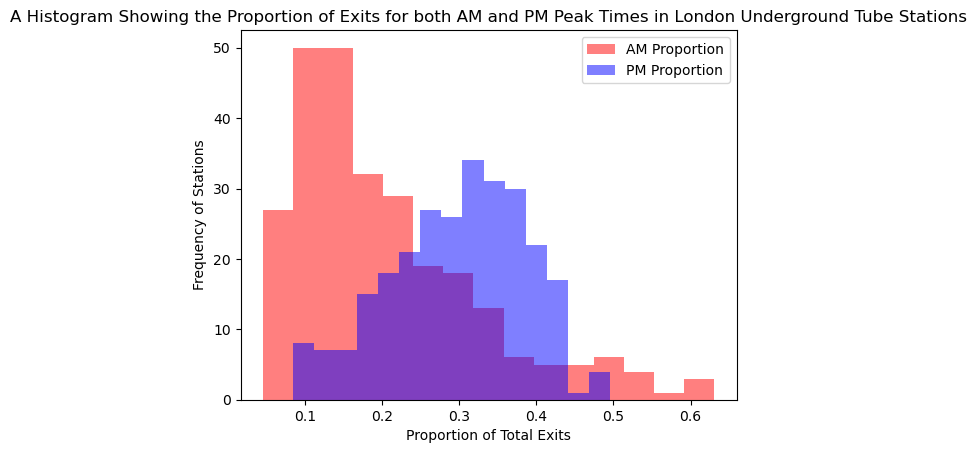

In [6]:
plt.hist(peak_counts.loc[:,"AMproportion"], label = "AM Proportion", alpha = .5, bins = 15, color = "red")
plt.hist(peak_counts.loc[:,"PMproportion"], label = "PM Proportion", alpha =.5, bins = 15, color = "blue")
plt.xlabel("Proportion of Total Exits")
plt.ylabel("Frequency of Stations")
plt.title("A Histogram Showing the Proportion of Exits for both AM and PM Peak Times in London Underground Tube Stations")
plt.legend()
plt.show

#### *Description of the Histogram showing AMproportion and PMproportions*

From just visualisation of these histograms, it is evident that the AMproportion histogram is more widely distributed compared to PMproporton. Looking at the concentration of data, the PMproportion seems to be more uniform and more symmetrical than AMproportion, with the majority of its values concentrated in a bulk in the middle. The histogram for PMproportion does show a slight negative skew, which contrasts to the great positive skew seen in AMproportion that has a large amount of its data concentrated to the left. As mentioned earlier, this relates to the work patterns seen in London as more people travel into the city in the morning compared to the evening, which causes a skew in data. 


# Part 3: A Simple Classification of Stations

This section focuses on classifying each station as either Work, Residential, or Other. A station is defined as Work if it has **significantly** more exits in the AM than PM and Residential if has **significantly** more exits in PM than AM. Stations that do not if into either of these categories are termed Other. 

<br> The approach taken here to define the stations is through a ratio. Initially, the AMpeak column was divided by PMpeaks to create a ratio between the stations. Then **.describe()** is used to look at the summary of this ratio and pick out two threshold values to distinguish Work and Residential stations. From the data, 75% of stations is at 1.05 and therefore 1.05 was chosen as the threshold to distinguish Work stations - in doing so, the top 25% of highest exited stations are classified as Work. Similarly, 50% of stations are at 0.55 and so 0.55 was chosen as the threshold to distinguish Residential stations. Lastly, stations that are classified as Other are those between 50% and 75% and these tend to be areas that are a mixture of Residential and Work.

<br> Thereafter, a report on the classifications of a few Northern line stations is given with brief comments on this classification function.

In [7]:
peak_counts["AM_vs_PM"] = peak_counts.AMpeak/peak_counts.PMpeak
peak_counts.describe()

,AMpeak,PMpeak,Total_exits,AMproportion,PMproportion,AM_vs_PM
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,4549.768657,4477.555970,17194.477612,0.207132,0.298750,0.966229
std,8181.784059,6276.463316,23480.190142,0.122161,0.087724,1.148915
min,27.000000,239.000000,596.000000,0.045302,0.084630,0.108634
25%,677.500000,1471.750000,4889.500000,0.116120,0.240947,0.327530
50%,1517.000000,2622.000000,9210.000000,0.169378,0.307397,0.555720
75%,4315.250000,4707.750000,19999.500000,0.266443,0.361596,1.050702
max,61116.000000,59486.000000,149258.000000,0.630427,0.496079,7.325050


In [8]:
"""
Here, a function is created that assorts the different stations according to the prespecified thresholds mentioned above. 
Thereafter, assign.() and apply.() are used to apply the function to the peak_counts dataset which is stored under classified_counts
"""
#classified_counts.loc[classified_counts["Classification"] == "Work"].describe()

def sorter(peak_counts):
    if peak_counts.AM_vs_PM > 1.05:
        return "Work"
    elif peak_counts.AM_vs_PM < 0.55:
        return "Residential"
    else:
        return "Other"

classified_counts = peak_counts.assign(Classification = peak_counts.apply(sorter, axis=1))
classified_counts

,AMpeak,PMpeak,Total_exits,AMproportion,PMproportion,AM_vs_PM,Classification
Station,,,,,,,
Acton Town,1970,2628,9362,0.210425,0.280709,0.749619,Other
Aldgate,7408,2992,16136,0.459098,0.185424,2.475936,Work
Aldgate East,7618,3803,21206,0.359238,0.179336,2.003155,Work
Alperton,856,1847,5118,0.167253,0.360883,0.463454,Residential
Amersham,424,1465,3905,0.108579,0.375160,0.289420,Residential
...,...,...,...,...,...,...,...
Wimbledon Park,497,1114,3296,0.150789,0.337985,0.446140,Residential
Wood Green,2165,6494,18989,0.114013,0.341987,0.333385,Residential
Wood Lane,1798,1766,6610,0.272012,0.267171,1.018120,Other


In [9]:
"""
The names of Northern line stations that needs to be reported are put into list which is fed into .loc[] to find
the classification of these stations. This is saved into ns_class which is printed out below.
"""

northern_stations = ["Archway", "Balham", "Embankment", "Goodge Street", "Highgate", "High Barnet", "Leicester Square", "Morden", "South Wimbledon", "Tottenham Court Road", "Warren Street"]

ns_class = classified_counts.loc[northern_stations, "Classification"]
ns_class

Station
Archway                 Residential
Balham                  Residential
Embankment                     Work
Goodge Street                  Work
Highgate                Residential
High Barnet             Residential
Leicester Square              Other
Morden                  Residential
South Wimbledon               Other
Tottenham Court Road           Work
Warren Street                  Work
Name: Classification, dtype: object

#### Brief Comments on the Classification of Northern Line Stations

Looking at the classification of these few Northern Line stations, I believe the functions seems to have defined the stations quite well. Stations that are tourist/event heavy such as Leicester Square and South Wimbledon have been classified as Other; these stations tend to have a regular amount of exits . Stations such as Tottenham Court Road and Warren Street, which are in zone 1 near Universities and a lot of businesses have been classified as Work. Stations that are futher out of London such as High Barnet and Highgate are considered to be Residential as more people tend to live here than to travel here for work. Overall, this classification system has managed to assort these stations which some level of accuracy through the AM and PM peak exits.